# Notebook for the figures generated in Workflow1

In [5]:
## save the final result data to the supplemntary table
import pandas as pd
df = pd.read_csv('./data/GO_term_analysis/simrank_pval_LLM_processed_selected_1000_go_terms.tsv', sep='\t')
# check if there is any NA 
df.isna().sum()

df.to_csv('./supplementary_information/Supplementary Table 1. Complete GPT-4 Analysis of GO Terms.tsv', sep='\t', index=False)

### Extendend data fig 1

GO term size distribution 

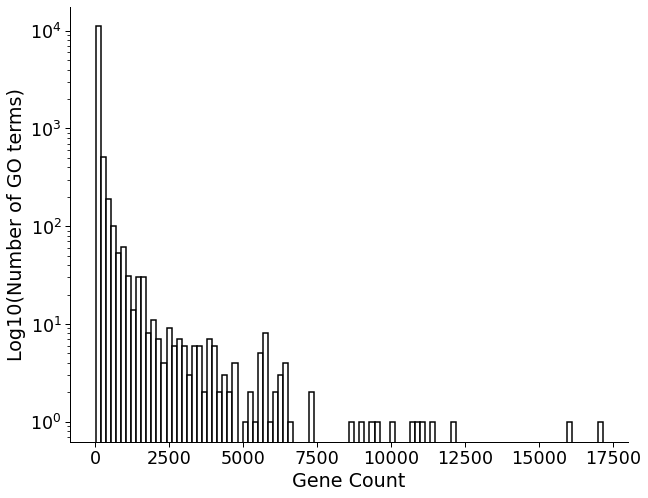

In [1]:
## distribution of original go term sizes
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

go_terms = pd.read_csv('data/go_terms.csv', sep = ',',index_col=0)

sns.set_context("paper", font_scale=2)
plt.rcParams['pdf.fonttype'] = 42


fig, ax = plt.subplots(figsize=(10,8))
# Apply log transformation to the 'Gene_Count' column
# go_terms['log_Gene_Count'] = np.log2(go_terms['Gene_Count'])
ax.set(yscale="log")
# Plotting the distribution of the log-transformed data
sns.histplot(go_terms['Gene_Count'], bins=100, edgecolor='black',color='white', linewidth=1.5, rasterized=True)

plt.xlabel('Gene Count')
plt.ylabel('Log10(Number of GO terms)')
sns.despine()
plt.savefig('figures/full_GO_term_size_distribution_logcount.pdf',dpi = 300, bbox_inches='tight')
plt.show()


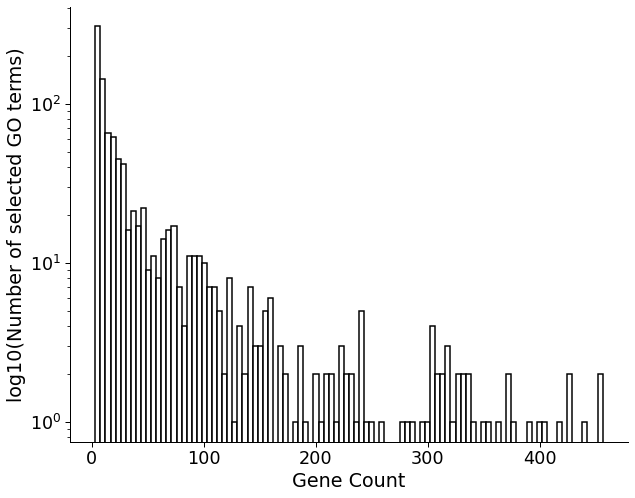

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

input_file = 'data/GO_term_analysis/1000_selected_go_terms.csv'
thousand_GO = pd.read_csv(input_file, sep = ',')

sns.set_context("paper", font_scale=2)
plt.rcParams['pdf.fonttype'] = 42


fig, ax = plt.subplots(figsize=(10, 8))
ax.set(yscale="log")
sns.histplot(thousand_GO['Gene_Count'], bins = 100, color='white', edgecolor='black', linewidth=1.5, ax=ax, rasterized=True)
sns.despine()

plt.xlabel('Gene Count')
plt.ylabel('log10(Number of selected GO terms)')
plt.savefig('figures/thousand_GO_term_size_distribution.pdf', dpi=300, bbox_inches='tight')
plt.show()

### Fig. 2 
### Panel b: CDF of the similarity quantile with random curve
random similarity from picking a random GO from the thousand GO terms

Similarity percentile at count cutoff 500: 97.99%


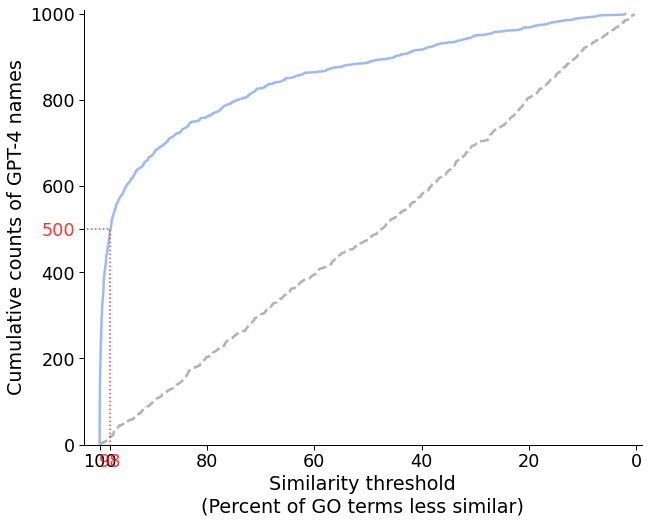

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/GO_term_analysis/simrank_LLM_processed_selected_1000_go_terms.tsv', sep='\t')


# count_cutoff = 500 # label the entry at 500 

sns.set_context("paper", font_scale=2)
plt.rcParams['pdf.fonttype'] = 42
fig, ax = plt.subplots(figsize=(10, 8))

# Calculate the cumulative counts
df_sorted = df["true_GO_term_sim_percentile"].sort_values(ascending=False)
cumulative_counts = np.arange(1, len(df_sorted) + 1)

# Draw the ECDF with raw counts on the y-axis
# x axis be the percentage not the raw fraction
#66C5CC,#F6CF71,#F89C74,#DCB0F2,#87C55F,#9EB9F3,#FE88B1,#C9DB74,#8BE0A4,#B497E7,#D3B484,#B3B3B3
ax.plot([perc*100 for perc in df_sorted], cumulative_counts, color='#9EB9F3', linewidth=2.5, label='Assigned GO')

rand_percentiles = df['random_sim_percentile'].sort_values(ascending=False)
cumulative_counts_random = np.arange(1, len(rand_percentiles) + 1)
ax.plot([perc*100 for perc in rand_percentiles], cumulative_counts_random, color='#B3B3B3', linewidth=2.5, linestyle='--', label='Random GO')


# find the sim percentile at count_cutoff
for count_cutoff in [500]:

    sim_percentile_at_count_cutoff = df_sorted.iloc[count_cutoff-1]

    print(f'Similarity percentile at count cutoff {count_cutoff}: {sim_percentile_at_count_cutoff*100:.2f}%')

    ax.plot([103, sim_percentile_at_count_cutoff*100, sim_percentile_at_count_cutoff*100], [count_cutoff, count_cutoff, 0], color='red', linestyle=':', alpha= 0.8,linewidth=1.5)

    

    # Set ticks on the x-axis and y-axis
    ax.set_xticks(list(ax.get_xticks()) + [sim_percentile_at_count_cutoff*100])
    ax.set_yticks(list(ax.get_yticks()) + [count_cutoff] )

    # Get the tick labels
    xticklabels = ax.get_xticklabels()
    yticklabels = ax.get_yticklabels()


    # Modify specific tick label color on x-axis
    xticklabels[-1].set_color('red')
    xticklabels[-1].set_alpha(0.8)

    # Modify specific tick label color on y-axis
    yticklabels[-1].set_color('red')
    yticklabels[-1].set_alpha(0.8)

# invert x axis
plt.gca().invert_xaxis()

        
ax.set_xlim(103, -1)
ax.set_ylim(0, 1010)
ax.set_xlabel('Similarity threshold\n(Percent of GO terms less similar)')
plt.ylabel('Cumulative counts of GPT-4 names')
# ax.text(0.12, percentage_at_0_01, 'True GO in the top 1%', horizontalalignment='left', verticalalignment='bottom', 
#          transform=ax.transAxes, fontsize=14, color='red', alpha=0.8)

sns.despine()
plt.savefig(f"figures/LLM_name_GO_term_percentile_CDF_w_random_byGO_revertX_100to1.pdf", dpi=300, bbox_inches='tight')
plt.show()


In [8]:
print(f"median of the similarity scores: {df['LLM_name_GO_term_sim'].median()}")
print(f"mean of the similarity scores: {df['LLM_name_GO_term_sim'].mean()}")
print(f"std of the similarity scores: {df['LLM_name_GO_term_sim'].std()}")


print(f"median of the quantile scores: {df['true_GO_term_sim_percentile'].median()}")
print(f"mean of the quantile scores: {df['true_GO_term_sim_percentile'].mean()}")
print(f"std of the quantile scores: {df['true_GO_term_sim_percentile'].std()}")


median of the similarity scores: 0.51111273
mean of the similarity scores: 0.5208349234199996
std of the similarity scores: 0.18435288108055706
median of the quantile scores: 0.979613558211888
mean of the quantile scores: 0.8575866219092843
std of the quantile scores: 0.2307182534705714


In [9]:
print('median +sd', df['true_GO_term_sim_percentile'].median()+df['true_GO_term_sim_percentile'].std())
print('number of terms with quantile within median + std', sum((df['true_GO_term_sim_percentile'] <= df['true_GO_term_sim_percentile'].median()+df['true_GO_term_sim_percentile'].std())))

median +sd 1.2103318116824595
number of terms with quantile within median + std 1000


## Fig. 2a: example GO term for conversion between similarity to percentile ranking

randomly select a term and convers semantic similarity to percentile score

regulation of sister chromatid cohesion 0.46495438
gpt4name:  DNA Repair and Chromosome Segregation
The y-value at x=0.46495438 is 0.9485329686381067


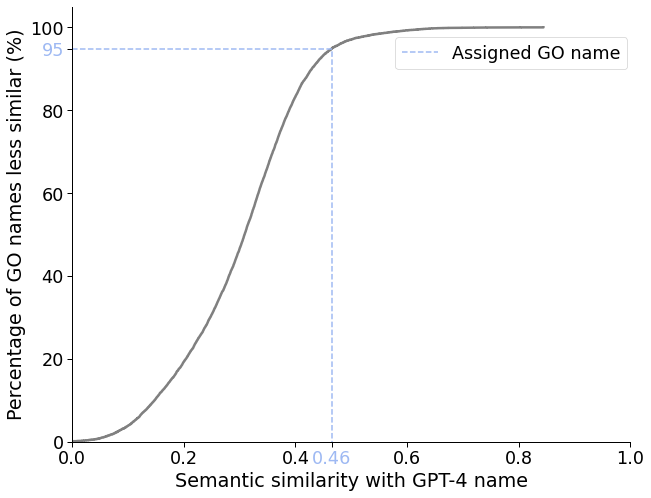

In [12]:
# plot for one selected term 
import numpy as np
import random 
import pandas as pd

df = pd.read_csv('data/GO_term_analysis/simrank_LLM_processed_selected_1000_go_terms.tsv', sep='\t')
# load the list of all go term similarities
with open ("data/GO_term_analysis/all_go_sim_scores.txt", "r") as f:
    all_go_sim_list = [float(line.strip()) for line in f]
binsize = len(all_go_sim_list)//1000
start = 0 
end = binsize


# Get the GO term and Z score for that index
# get a random index
random.seed(1)
random_index = random.randint(0, len(df)-1)

go_term = df.loc[random_index, 'Term_Description']
gpt4_name = df.loc[random_index, 'LLM Name']
sim = df.loc[df['Term_Description'] == go_term, 'LLM_name_GO_term_sim'].values[0]


print(go_term, sim)
print('gpt4name: ', gpt4_name)

# Select a distribution related to the random GO term
random_distribution = all_go_sim_list[random_index * binsize: (random_index+1) * binsize]

import matplotlib.pyplot as plt 
import seaborn as sns

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Compute the ECDF for your data
x, y = ecdf(random_distribution)

sns.set_context("paper", font_scale=2)
plt.rcParams['pdf.fonttype'] = 42
# make a cdf plot for the selected GO term 
fig, ax = plt.subplots(figsize=(10, 8))
sns.ecdfplot(data=random_distribution, ax=ax, linewidth=2.5, color='grey', stat="proportion")


# Compute the y-value at x = sim and scale it to be between 0 and 100
y_value_at_sim = y[np.where(x == sim)][0] if sim in x else np.interp(sim, x, y)

print(f"The y-value at x={sim} is {y_value_at_sim}")

ax.plot([0, sim, sim], [y_value_at_sim, y_value_at_sim, 0], color='#9EB9F3', linestyle='--', linewidth=1.5, label='Assigned GO name')
ax.legend(loc='upper right', bbox_to_anchor=(1.01, 0.95))
# Set ticks on the x-axis and y-axis
ax.set_xticks(list(ax.get_xticks()) + [sim])
ax.set_yticks(list(ax.get_yticks()) + [y_value_at_sim])
ax.set_xticklabels(['{:.01f}'.format(x) for x in ax.get_xticks()[:-1]] + ['{:.02f}'.format(x) for x in ax.get_xticks()[-1:]])
ax.set_yticklabels(['{:.0f}'.format(x*100) for x in ax.get_yticks()])
# Get the tick labels
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()


# Modify specific tick label color on x-axis
xticklabels[-1].set_color('#9EB9F3')

# Modify specific tick label color on y-axis

yticklabels[-1].set_color('#9EB9F3')

ax.set_ylim(0, 1.05)
ax.set_xlim(0, 1)
ax.set_ylabel('Percentage of GO names less similar (%)')
ax.set_xlabel('Semantic similarity with GPT-4 name')
sns.despine()
plt.savefig(f"figures/LLM_name_GO_term_sim_against_random_cdf_{go_term}.pdf", dpi=300, bbox_inches='tight')
plt.show()


### Fig. 2d Venn diagram of the overlap between best GO name gene set and gene set query 

example:GO_0019433

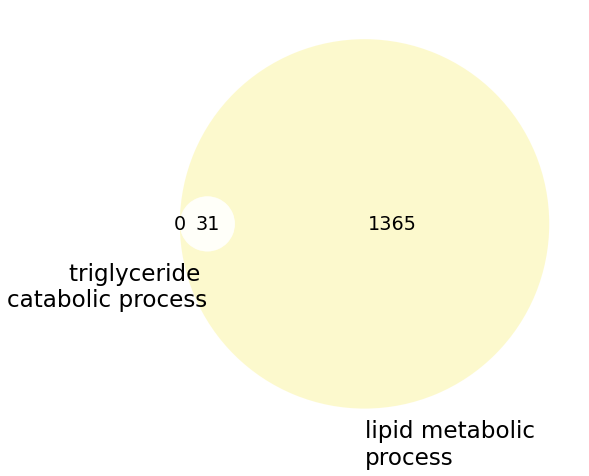

In [13]:
# Plot overlap between genesets
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

import seaborn as sns
import pandas as pd

df = pd.read_csv('data/GO_term_analysis/GO_0019433_subhierarchy_nodes.txt', sep='\t')
assigned = 'triglyceride catabolic process'
top_go =  'lipid metabolic process'
assigned_genes = df.loc[df['Term_Description'] == assigned, 'Genes'].str.split(' ').values[0]
top_go_genes = df.loc[df['Term_Description'] == top_go, 'Genes'].str.split(' ').values[0]

sns.set_context("paper", font_scale=2)
plt.rcParams['pdf.fonttype'] = 42
# plot venn diagram between two sets of genes
fig, ax = plt.subplots(figsize=(10, 8))

venn2([set(assigned_genes), set(top_go_genes)], set_labels = ('triglyceride \ncatabolic process', 'lipid metabolic \nprocess'), set_colors=['#FAC5C0', '#FBF49C'], ax=ax, alpha=0.5)
plt.savefig(f"figures/triglyceride_catabolic_process_vennDiagram.pdf", dpi=300, bbox_inches='tight')

plt.show()

### Fig.2e Plot gene set similarity significance score

1000 1000
Median of top1_q_log:  7.851139118971712 raw:  1.3988733182941054e-08
Median of random_q_log:  -4.342945178152237e-11 raw:  1.0
0.9999999995657055
p-value of Mann-Whitney U test:  1.179457969634071e-279


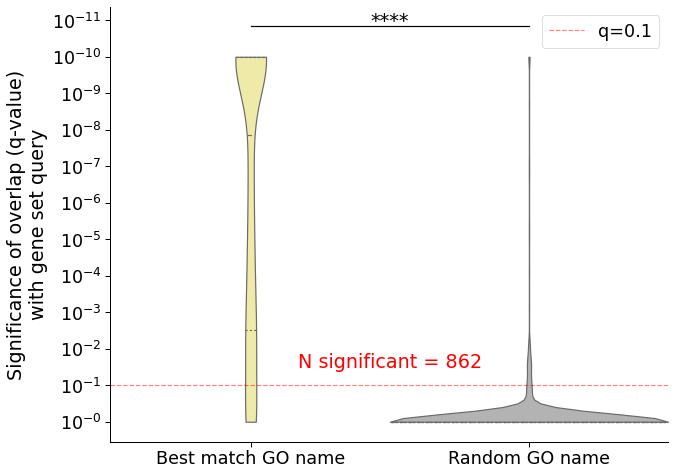

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import mannwhitneyu
from matplotlib.ticker import FuncFormatter, MultipleLocator
import pandas as pd 
df = pd.read_csv('data/GO_term_analysis/simrank_pval_LLM_processed_selected_1000_go_terms.tsv', sep='\t')

cutoff = 0.1


top1_q = df['adj_pvals'].str.split('|').apply(lambda x: float(x[0]))
random_q = df['random_adj_pvals'].apply(lambda x: float(x))

# -log signifiance
# calculate -log(q)
eps = 1e-10
top1_q_log = -np.log10(top1_q+eps)
random_q_log = -np.log10(random_q+eps)
print(len(top1_q_log), len(random_q_log))
print('Median of top1_q_log: ', top1_q_log.median(), 'raw: ', top1_q.median())
print('Median of random_q_log: ', random_q_log.median(), 'raw: ', random_q.median())
significant = -np.log10(cutoff+eps)
print(significant)

sns.set_context("paper", font_scale=2)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams["axes.unicode_minus"] = True

fig, ax = plt.subplots(figsize=(10, 8))

# add statistical test 

diff_p = mannwhitneyu(top1_q_log, random_q_log)[1]
print('p-value of Mann-Whitney U test: ', diff_p)

sns.violinplot(data=[top1_q_log, random_q_log], ax=ax, palette=['#FBF49C', '#B3B3B3'], inner='quartile', cut=0, split=True, width=1)



def format_func(value, tick_number):
    if value >= 0:
        return f'$10^{{-{int(value)}}}$'
    else:
        return f'$10^{{{-int(value)}}}$'

ax.yaxis.set_major_formatter(FuncFormatter(format_func))
ax.yaxis.set_major_locator(MultipleLocator(1))

ax.set_ylabel("Significance of overlap (q-value)\nwith gene set query")

ax.axhline(significant, ls='--', color='red', alpha=0.5, label=f'q={cutoff}')
ax.legend(loc='upper right')
ax.set_xticklabels(["Best match GO name", "Random GO name"])
# Get the current x-limits
x_min, x_max = ax.get_xlim()

# Set new x-limits with more space on the left
ax.set_xlim(x_min - 0.005, x_max)

# Calculate the number of significant best match GOs
n_significant = (top1_q < cutoff).sum()

# Add text above the line showing the number of significant best match GOs
ax.text(0.5, significant + 0.5, f'N significant = {n_significant}', color='red', ha='center')

# add significance bar

max_y = max(max(top1_q_log), max(random_q_log))+0.03  # find the maximum y value with some gap
bar_height = max_y * 0.08  # set height of the bar to be 8% of the maximum y value
bar_start = 0 
bar_end = 1 

plt.plot([bar_start, bar_end], [max_y + bar_height, max_y + bar_height], color='black')  # plot horizontal line
# plt.plot([bar_start, bar_start], [max_y, max_y + bar_height], color='black')  # plot vertical line at start of the bar
# plt.plot([bar_end, bar_end], [max_y, max_y + bar_height], color='black')  # plot vertical line at end of the bar

# add asterisks or other text to indicate the level of significance
if diff_p < 0.0001:
    plt.text((bar_start + bar_end) / 2, max_y + bar_height, "****", ha='center')
elif diff_p < 0.001:
    plt.text((bar_start + bar_end) / 2, max_y + bar_height, "***", ha='center')
elif diff_p < 0.01:
    plt.text((bar_start + bar_end) / 2, max_y + bar_height, "**", ha='center')
elif diff_p < 0.05:
    plt.text((bar_start + bar_end) / 2, max_y + bar_height, "*", ha='center')
else:
    plt.text((bar_start + bar_end) / 2, max_y + bar_height, "ns", ha='center')


sns.despine()

plt.savefig("figures/LLM_name_GO_term_bestmatch_logq_violin_cutoff01.pdf", dpi=300, bbox_inches='tight')
plt.show()